In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../content/drive/MyDrive/Data Analysis/M 4. Data visualization/yulu_rental.csv')
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


**Питання 1: Як змінюється загальна кількість оренд велосипедів протягом року?**

Опис: Ми побудуємо лінійну діаграму для відображення щоденної динаміки загальної кількості оренд за колонкою count.

In [4]:
df['datetime'] = pd.to_datetime(df['datetime']) # Перетворення datetime для групування по датах.
df['date'] = df['datetime'].dt.date

In [5]:

df_daily = df.groupby('date')['count'].sum().reset_index() # Групування саме по датах.

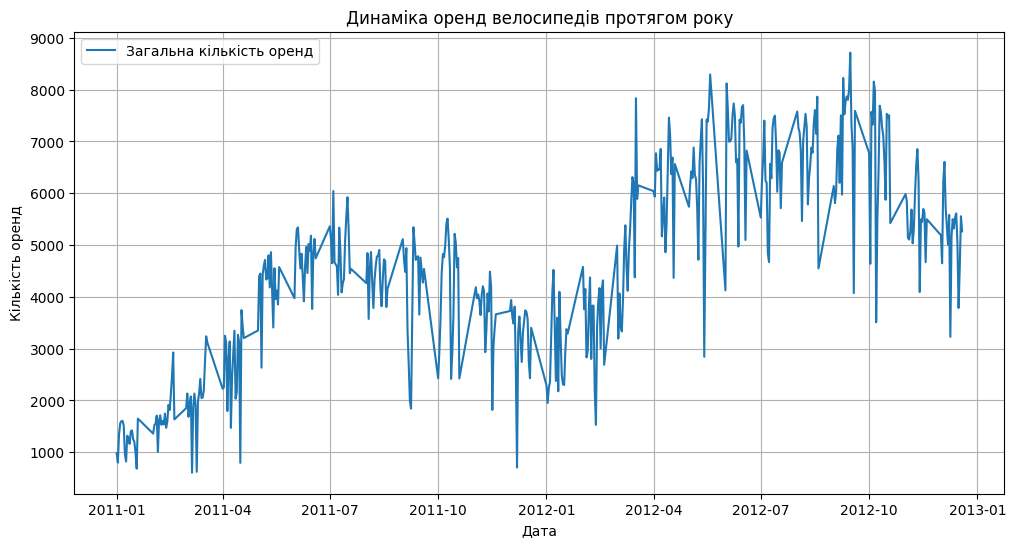

In [6]:
plt.figure(figsize=(12, 6)) # Побудуємо лінійну діаграму для відображення щоденної динаміки загальної кількості оренд за колонкою count.
plt.plot(df_daily['date'], df_daily['count'], label='Загальна кількість оренд')
plt.title('Динаміка оренд велосипедів протягом року')
plt.xlabel('Дата')
plt.ylabel('Кількість оренд')
plt.legend()
plt.grid()
plt.show()

**Висновки:**
Графік показує сезонні коливання кількості оренд. Можна спостерігати зростання навесні та влітку, зниження взимку.

**Питання 2: Який середній рівень вологості за сезонами?**

Опис: Ми згрупуємо дані за колонкою season, розрахуємо середню вологість і побудуємо стовпчасту діаграму.

In [7]:
df_season = df.groupby('season')['humidity'].mean().reset_index() # Групуємо по сезонах

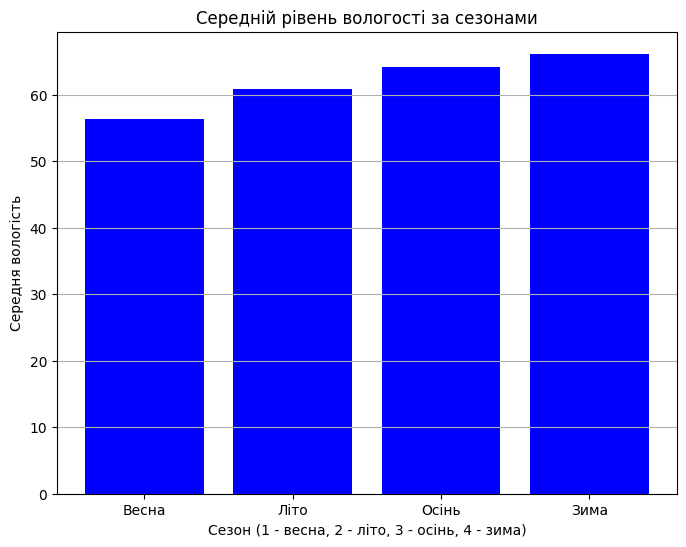

In [10]:
plt.figure(figsize=(8, 6))  # Побудуємо стовпчасту діаграму
plt.bar(df_season['season'], df_season['humidity'], color='b')
plt.title('Середній рівень вологості за сезонами')
plt.xlabel('Сезон (1 - весна, 2 - літо, 3 - осінь, 4 - зима)')
plt.ylabel('Середня вологість')
plt.xticks([1, 2, 3, 4], ['Весна', 'Літо', 'Осінь', 'Зима'])
plt.grid(axis='y')
plt.show()

**Висновки:**
Взимку і восени вологість є вищою, ніж влітку та весною, що логічно через сезонні погодні зміни.

**Питання 3: Чи існує залежність між температурою та кількістю зареєстрованих користувачів?**

Опис: Створимо нову колонку temperature_diff для різниці між реальною і відчутною температурою, побудуємо scatter plot для візуалізації взаємозв’язку між temperature та registered.



In [11]:
df['temperature_diff'] = df['temp'] - df['atemp']  # Додавання нової колонки

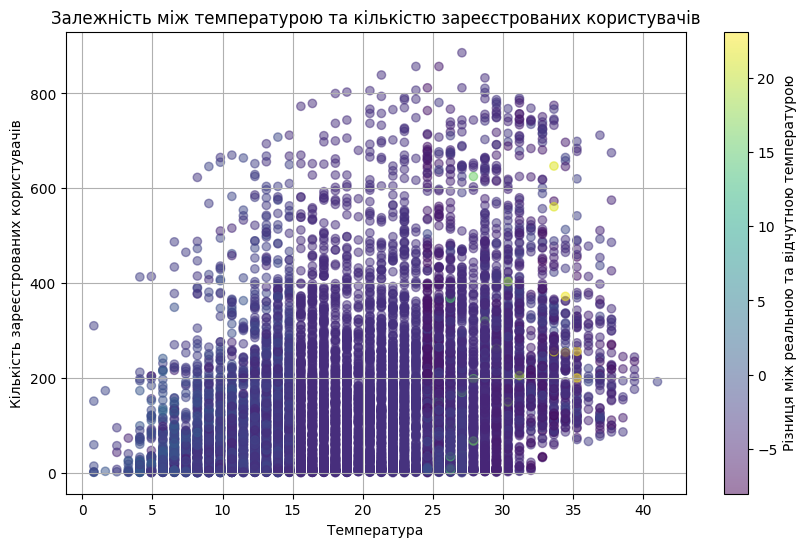

In [13]:
plt.figure(figsize=(10, 6))  # Побудуємо scatter plot

plt.scatter(df['temp'], df['registered'], alpha=0.5, c=df['temperature_diff'])
plt.colorbar(label='Різниця між реальною та відчутною температурою')
plt.title('Залежність між температурою та кількістю зареєстрованих користувачів')
plt.xlabel('Температура')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.grid()
plt.show()

**Висновки:**
Кількість зареєстрованих користувачів збільшується із зростанням температури. Великі розбіжності між реальною та відчутною температурою також можуть впливати на кількість поїздок.